In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'edgeiiotset-cyber-security-dataset-of-iot-iiot:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1870444%2F3319673%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240630%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240630T103646Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D34bdab005412937928599b1780034c192443e65d5e581359d42c8927e2ff8343d51703326adcae59c04f003e2e3932c856e710f8cfe29446abc14306c700ddd5b1e0f19f4634baf36f6750c543f56db99f1ddf6b8f56adb76f0f0474dc275f98c341ca4edb51c61557302a95b197239391c458bd13e34405e0b8bcfd253d2f346fb65349aabf5073cb00c5300d2c19db3e69e446a12e7e92fbd4e8e430ddaa3eb36a55aa6239b09dca5b057de78bab7218cd048c505824a8704027b929cd8ca4379301e1f195eb7201e41d8a3bec093db323f4d82178891ec86ba6036415f62a70880abd42e2211141f07f3a4d11e8408f52034286befa04cd3eebdcc4eb87b6'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1746605436 bytes downloaded
Downloaded and uncompressed: edgeiiotset-cyber-security-dataset-of-iot-iiot
Data source import complete.


# ***Clean Code***

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)
pd.set_option('display.max_columns', None) # setting to print All columns from dataframe


In [ ]:
# Tune datset & remove **** columns/rows

from sklearn.utils import shuffle


# List of columns to remove
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]


df.drop(drop_columns, axis=1, inplace=True) # drop colomns

df.dropna(axis=0, how='any', inplace=True) # removes the rows that contains NULL value

df.drop_duplicates(subset=None, keep="first", inplace=True) # drop duplicated rown.

#df = shuffle(df)  # function to shuffle dataset (mélanger)

#print(df.isna().sum())

print(df['Attack_type'].value_counts())

Attack_type
Normal                   1363998
DDoS_UDP                  121567
DDoS_ICMP                  67939
SQL_injection              50826
DDoS_TCP                   50062
Vulnerability_scanner      50026
Password                   49933
DDoS_HTTP                  48544
Uploading                  36807
Backdoor                   24026
Port_Scanning              19977
XSS                        15066
Ransomware                  9689
Fingerprinting               853
MITM                         358
Name: count, dtype: int64


In [ ]:
dfTest = df.copy()

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(dfTest,'http.request.method')

encode_text_dummy(dfTest,'http.referer')

encode_text_dummy(dfTest,"http.request.version")

encode_text_dummy(dfTest,"dns.qry.name.len")

encode_text_dummy(dfTest,"mqtt.conack.flags")

encode_text_dummy(dfTest,"mqtt.protoname")

encode_text_dummy(dfTest,"mqtt.topic")

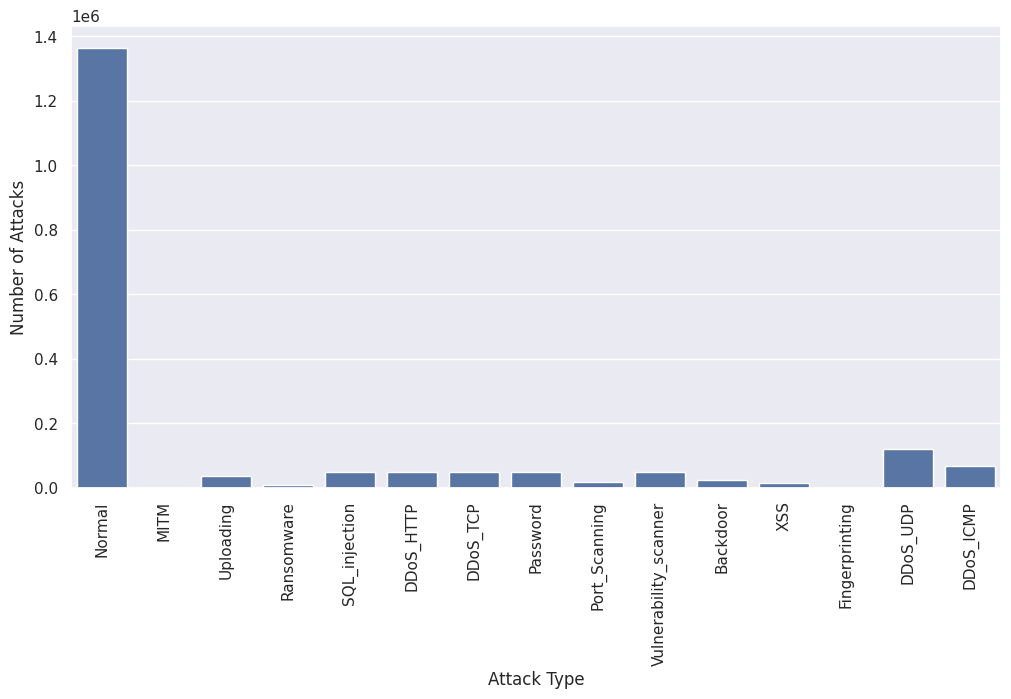

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Attack_type', data=dfTest)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

dfdf = dfTest.copy()
label_encoder = LabelEncoder()
dfdf['Attack_type']= label_encoder.fit_transform(dfdf['Attack_type'])

In [ ]:
attackName = dfTest['Attack_type'].unique()
attackCode = dfdf['Attack_type'].unique()

In [ ]:
for i in range (len(attackCode)):
    print("code : {}\t=>  {} ".format(attackCode[i],attackName[i]))

code : 7	=>  Normal 
code : 6	=>  MITM 
code : 12	=>  Uploading 
code : 10	=>  Ransomware 
code : 11	=>  SQL_injection 
code : 1	=>  DDoS_HTTP 
code : 3	=>  DDoS_TCP 
code : 8	=>  Password 
code : 9	=>  Port_Scanning 
code : 13	=>  Vulnerability_scanner 
code : 0	=>  Backdoor 
code : 14	=>  XSS 
code : 5	=>  Fingerprinting 
code : 4	=>  DDoS_UDP 
code : 2	=>  DDoS_ICMP 


In [ ]:
dfNormal = dfdf[dfdf["Attack_type"]==7]
dfDDoS_ICMP = dfdf[dfdf["Attack_type"]==8]
dfPassword = dfdf[dfdf["Attack_type"]==2]
dfDDoS_HTTP = dfdf[dfdf["Attack_type"]==1]
dfSQL_injection = dfdf[dfdf["Attack_type"]==11]
dfDDoS_TCP = dfdf[dfdf["Attack_type"]==3]
dfDDoS_UDP = dfdf[dfdf["Attack_type"]==4]
dfUploading = dfdf[dfdf["Attack_type"]==12]
dfPort_Scanning = dfdf[dfdf["Attack_type"]==9]
dfRansomware = dfdf[dfdf["Attack_type"]==10]
dfXSS = dfdf[dfdf["Attack_type"]==14]
dfBackdoor = dfdf[dfdf["Attack_type"]==0]
dfVulnerability_scanner = dfdf[dfdf["Attack_type"]==13]
dfFingerprinting = dfdf[dfdf["Attack_type"]==5]
dfMITM = dfdf[dfdf["Attack_type"]==6]

In [ ]:
from sklearn.utils import resample

Re_dfMITM = resample(dfMITM, n_samples=200000,random_state=123, replace=True)
Re_dfDDoS_ICMP = resample(dfDDoS_ICMP, n_samples=200000,random_state=123, replace=True)
Re_dfPassword = resample(dfPassword, n_samples=200000,random_state=123, replace=True)
Re_dfDDoS_HTTP = resample(dfDDoS_HTTP, n_samples=200000,random_state=123, replace=True)
Re_dfSQL_injection = resample(dfSQL_injection, n_samples=200000,random_state=123, replace=True)
Re_dfDDoS_TCP = resample(dfDDoS_TCP, n_samples=200000,random_state=123, replace=True)
Re_dfDDoS_UDP = resample(dfDDoS_UDP, n_samples=200000,random_state=123, replace=True)
Re_dfUploading = resample(dfUploading, n_samples=200000,random_state=123, replace=True)
Re_dfPort_Scanning = resample(dfPort_Scanning, n_samples=200000,random_state=123, replace=True)
Re_dfRansomware = resample(dfRansomware, n_samples=200000,random_state=123, replace=True)
Re_dfXSS = resample(dfXSS, n_samples=200000,random_state=123, replace=True)
Re_dfBackdoor = resample(dfBackdoor, n_samples=200000,random_state=123, replace=True)
Re_dfVulnerability_scanner = resample(dfVulnerability_scanner, n_samples=200000,random_state=123, replace=True)
Re_dfFingerprinting = resample(dfFingerprinting, n_samples=200000,random_state=123, replace=True)


In [ ]:
Re_dfNormal = dfNormal.sample(frac = 0.2)
len(dfNormal)


1363998

In [ ]:
dataset = pd.concat([Re_dfNormal,Re_dfMITM,Re_dfDDoS_ICMP,Re_dfPassword,
                           Re_dfDDoS_HTTP,Re_dfSQL_injection,Re_dfDDoS_TCP ,
                           Re_dfDDoS_UDP,Re_dfUploading ,Re_dfPort_Scanning,
                           Re_dfRansomware,Re_dfXSS,Re_dfBackdoor,
                           Re_dfVulnerability_scanner,Re_dfFingerprinting])

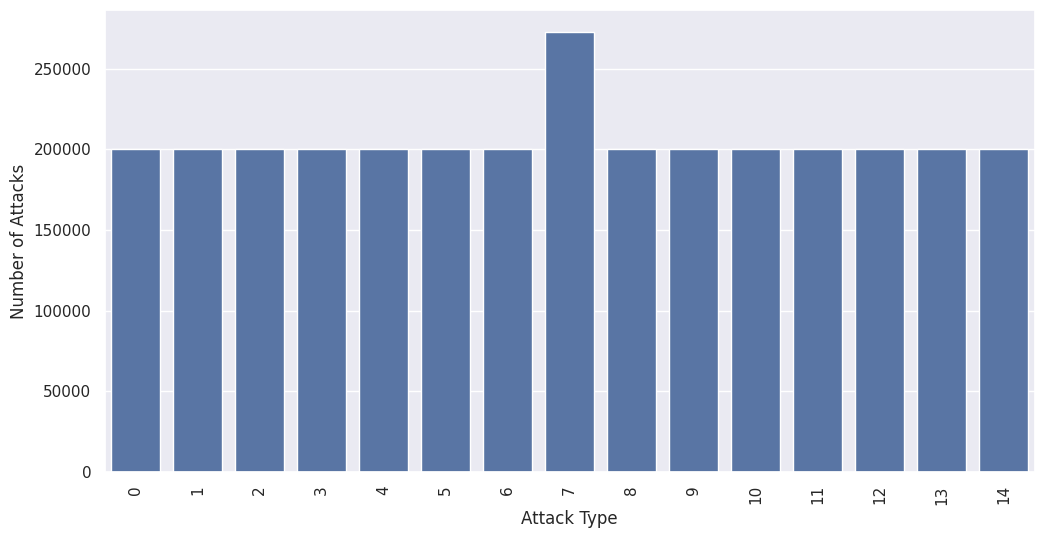

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Attack_type', data=dataset)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_dfNormal = Re_dfNormal[:int(len(Re_dfNormal)*0.8)]
test_dfNormal = Re_dfNormal[int(len(Re_dfNormal)*0.8):]
print(len(test_dfNormal),len(train_dfNormal))



train_dfMITM = Re_dfMITM[:int(len(Re_dfMITM)*0.8)]
test_dfMITM = Re_dfMITM[int(len(Re_dfMITM)*0.8):]
print(len(test_dfMITM),len(train_dfMITM))



test_dfDDoS_ICMP = Re_dfDDoS_ICMP[int(len(Re_dfDDoS_ICMP)*0.8):]
train_dfDDoS_ICMP = Re_dfDDoS_ICMP[:int(len(Re_dfDDoS_ICMP)*0.8)]
print(len(test_dfDDoS_ICMP),len(train_dfDDoS_ICMP))


test_dfPassword = Re_dfPassword[int(len(Re_dfPassword)*0.8):]
train_dfPassword = Re_dfPassword[:int(len(Re_dfPassword)*0.8)]
print(len(test_dfPassword),len(train_dfPassword))



test_dfDDoS_HTTP = Re_dfDDoS_HTTP[int(len(Re_dfDDoS_HTTP)*0.8):]
train_dfDDoS_HTTP = Re_dfDDoS_HTTP[:int(len(Re_dfDDoS_HTTP)*0.8)]
print(len(test_dfDDoS_HTTP),len(train_dfDDoS_HTTP))



test_dfSQL_injection = Re_dfSQL_injection[int(len(Re_dfSQL_injection)*0.8):]
train_dfSQL_injection = Re_dfSQL_injection[:int(len(Re_dfSQL_injection)*0.8)]
print(len(test_dfSQL_injection),len(train_dfSQL_injection))



test_dfDDoS_TCP = Re_dfDDoS_TCP[int(len(Re_dfDDoS_TCP)*0.8):]
train_dfDDoS_TCP = Re_dfDDoS_TCP[:int(len(Re_dfDDoS_TCP)*0.8)]
print(len(test_dfDDoS_TCP),len(train_dfDDoS_TCP))



test_dfDDoS_UDP = Re_dfDDoS_UDP[int(len(Re_dfDDoS_UDP)*0.8):]
train_dfDDoS_UDP = Re_dfDDoS_UDP[:int(len(Re_dfDDoS_UDP)*0.8)]
print(len(test_dfDDoS_UDP),len(train_dfDDoS_UDP))


test_dfUploading = Re_dfUploading[int(len(Re_dfUploading)*0.8):]
train_dfUploading = Re_dfUploading[:int(len(Re_dfUploading)*0.8)]
print(len(test_dfUploading),len(train_dfUploading))

test_dfPort_Scanning = Re_dfPort_Scanning[int(len(Re_dfPort_Scanning)*0.8):]
train_dfPort_Scanning = Re_dfPort_Scanning[:int(len(Re_dfPort_Scanning)*0.8)]
print(len(test_dfPort_Scanning),len(train_dfPort_Scanning))

test_dfRansomware = Re_dfRansomware[int(len(Re_dfRansomware)*0.8):]
train_dfRansomware = Re_dfRansomware[:int(len(Re_dfRansomware)*0.8)]
print(len(test_dfRansomware),len(train_dfRansomware))

test_dfXSS = Re_dfXSS[int(len(Re_dfXSS)*0.8):]
train_dfXSS = Re_dfXSS[:int(len(Re_dfXSS)*0.8)]
print(len(test_dfXSS),len(train_dfXSS))

test_dfBackdoor = Re_dfBackdoor[int(len(Re_dfBackdoor)*0.8):]
train_dfBackdoor = Re_dfBackdoor[:int(len(Re_dfBackdoor)*0.8)]
print(len(test_dfBackdoor),len(train_dfBackdoor))

test_dfVulnerability_scanner = Re_dfVulnerability_scanner[int(len(Re_dfVulnerability_scanner)*0.8):]
train_dfVulnerability_scanner = Re_dfVulnerability_scanner[:int(len(Re_dfVulnerability_scanner)*0.8)]
print(len(test_dfVulnerability_scanner),len(train_dfVulnerability_scanner))


test_dfFingerprinting = Re_dfFingerprinting[int(len(Re_dfFingerprinting)*0.8):]
train_dfFingerprinting = Re_dfFingerprinting[:int(len(Re_dfFingerprinting)*0.8)]
print(len(test_dfFingerprinting),len(train_dfFingerprinting))


In [ ]:
train = pd.concat([train_dfNormal,train_dfMITM,train_dfDDoS_ICMP,train_dfPassword,
                           train_dfDDoS_HTTP,train_dfSQL_injection,train_dfDDoS_TCP ,
                           train_dfDDoS_UDP,train_dfUploading ,train_dfPort_Scanning,
                           train_dfRansomware,train_dfXSS,train_dfBackdoor,
                           train_dfVulnerability_scanner,train_dfFingerprinting])
print('done')
test = pd.concat([test_dfNormal,test_dfMITM,test_dfDDoS_ICMP,test_dfPassword,
                           test_dfDDoS_HTTP,test_dfSQL_injection,test_dfDDoS_TCP ,
                           test_dfDDoS_UDP,test_dfUploading ,test_dfPort_Scanning,
                           test_dfRansomware,test_dfXSS,test_dfBackdoor,
                           test_dfVulnerability_scanner,test_dfFingerprinting])
print('done')

In [ ]:
len(train),len(test)

In [ ]:
X_train = train.drop(["Attack_type","Attack_label"],axis=1)
Y_train = train["Attack_type"]

X_val = test.drop(["Attack_type","Attack_label"],axis=1)
Y_val = test["Attack_type"]

In [ ]:
from keras.utils.np_utils import to_categorical
yy_train = to_categorical(Y_train, num_classes=15)
yy_val = to_categorical(Y_val, num_classes=15)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(yy_train.shape)
print(yy_val.shape)

In [ ]:
# reshape the data for CNN
X_train = X_train.values.reshape(len(X_train), X_train.shape[1], 1)
X_val = X_val.values.reshape(len(X_val), X_val.shape[1], 1)
X_train.shape, X_val.shape

In [ ]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense

# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(95, 1)))
    model.add(BatchNormalization())
    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))


    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(95, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))


    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(95, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))


    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(15, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = model()
model.summary()

In [ ]:
from keras.callbacks import CSVLogger, ModelCheckpoint
logger = CSVLogger('logs.csv', append=True)
hist = model.fit(X_train, yy_train, epochs=50, batch_size=64,validation_data=(X_val, yy_val),callbacks=[logger])

In [ ]:
# check history of model
history = hist.history
history.keys()

In [ ]:
epochs = range(1, len(history['loss']) + 1)
acc = history['accuracy']
loss = history['loss']
val_acc = history['val_accuracy']
val_loss = history['val_loss']

# visualize training and val accuracy
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Accuracy (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_acc')
plt.legend()

# visualize train and val loss
plt.figure(figsize=(10, 5))
plt.title('Training and Validation Loss(CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, label='loss', color='g')
plt.plot(epochs, val_loss, label='val_loss', color='r')
plt.legend()

In [ ]:
del model , hist , history ,acc ,loss ,val_acc ,val_loss ,logger